# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [76]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16 * 6 * 6, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc2 = nn.Linear(84,10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


## 선형회귀(Linear Regression) 모델 생성

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

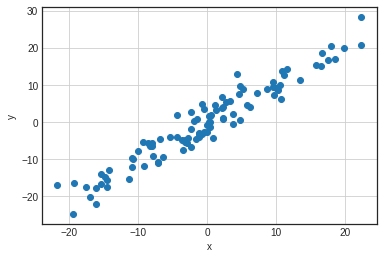

In [78]:
X = torch.randn(100,1)*10
y = X + 3 * torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [79]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [80]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [81]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


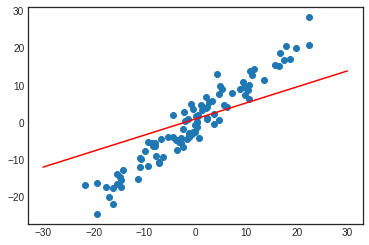

In [82]:
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')

In [83]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [84]:
epochs = 100
lossess = []
for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  lossess.append(loss)
  loss.backward()

  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch, loss))

Epoch:   0	loss: 44.3919
Epoch:  10	loss: 9.1550
Epoch:  20	loss: 8.7126
Epoch:  30	loss: 8.6847
Epoch:  40	loss: 8.6626
Epoch:  50	loss: 8.6415
Epoch:  60	loss: 8.6212
Epoch:  70	loss: 8.6017
Epoch:  80	loss: 8.5829
Epoch:  90	loss: 8.5649


In [85]:
np_loss = []
for i in lossess:
  np_loss.append(i.detach().numpy())
np_loss

[array(44.391857, dtype=float32),
 array(31.630165, dtype=float32),
 array(23.436838, dtype=float32),
 array(18.176203, dtype=float32),
 array(14.7982235, dtype=float32),
 array(12.628829, dtype=float32),
 array(11.235296, dtype=float32),
 array(10.339832, dtype=float32),
 array(9.764115, dtype=float32),
 array(9.393658, dtype=float32),
 array(9.154977, dtype=float32),
 array(9.00089, dtype=float32),
 array(8.9011135, dtype=float32),
 array(8.836207, dtype=float32),
 array(8.793686, dtype=float32),
 array(8.765541, dtype=float32),
 array(8.746626, dtype=float32),
 array(8.733644, dtype=float32),
 array(8.724468, dtype=float32),
 array(8.717743, dtype=float32),
 array(8.712594, dtype=float32),
 array(8.70846, dtype=float32),
 array(8.704979, dtype=float32),
 array(8.701922, dtype=float32),
 array(8.6991415, dtype=float32),
 array(8.696541, dtype=float32),
 array(8.694058, dtype=float32),
 array(8.691654, dtype=float32),
 array(8.689304, dtype=float32),
 array(8.6869955, dtype=float32),


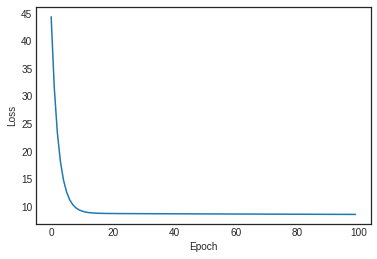

In [86]:
plt.plot(range(epochs), np_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

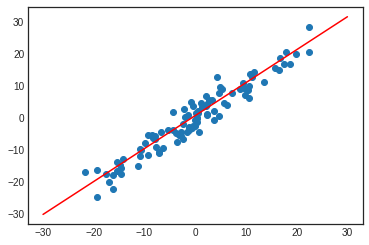

In [87]:
plot_fit('Trained Model')